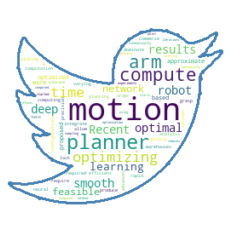

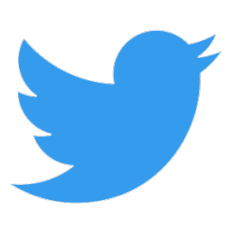

In [7]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text. (Here, "twitter.txt" is just a sample text)
# Here the text could be some data pull from our database, we generate the wordcloud based on the frequency
# of the words appear in our database. (We need to consider the time interval, i.e. the amount of data we pull)
text = open(path.join(d, 'twitter.txt')).read()

# read the mask image
# taken from
twitter_image = np.array(Image.open(path.join(d, "twitter_mask.png")))

# create mask  white is "masked out"
twitter_mask = twitter_image.copy()
twitter_mask[twitter_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(twitter_mask[:, :, i] / 255., 2) for i in range(3)], axis=0)
twitter_mask[edges > .08] = 255

# the build-in STOPWORDS list will be used, we could more STOPWORDS here.
stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=2000, mask=twitter_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "twitter.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()